1. Data Preprocessing

Loading Dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv('/content/sample_data/datasets_house_prices.csv')
print(data.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


1.2 Handling Missing Values

In [37]:
print(data.isnull())

     Size (sqft)  Bedrooms    Age  Proximity to Downtown (miles)  Price
0          False     False  False                          False  False
1          False     False  False                          False  False
2          False     False  False                          False  False
3          False     False  False                          False  False
4          False     False  False                          False  False
..           ...       ...    ...                            ...    ...
995        False     False  False                          False  False
996        False     False  False                          False  False
997        False     False  False                          False  False
998        False     False  False                          False  False
999        False     False  False                          False  False

[1000 rows x 5 columns]


1.3 Feature Selection

In [38]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['house_price'] = (data['Price']>0).astype(int)
x = data_dummies.drop(['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'],axis=1)
y = data_dummies['house_price']

2. Model Implementation

2.1 Linear Regression Implementation

In [39]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=80)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train_scaled, y_train)

LinearRegression()

2.2 Model Parameters (Slope and Intercept)

In [40]:
slope = linear_reg_model.coef_[0]
intercept = linear_reg_model.intercept_
print("Slope:", slope)
print("Intercept: ", intercept)

Slope: 0.0
Intercept:  1.0


2.3 Predicts the house price

In [41]:
def predict_price(size, bedrooms, age, proximity):
    X_input = np.array([1, size, bedrooms, age, proximity])
    return np.dot(X_input, np.concatenate((intercept, slope), axis=0))

3. Model Training

3.1 Splitting Dataset

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape[0]} samples")
print(f"Testing set size: {x_test.shape[0]} samples")

Training set size: 800 samples
Testing set size: 200 samples


3.2 Train your linear regression model on the training set.


In [43]:

x_train_with_intercept = np.hstack((np.ones((x_train.shape[0], 1)), x_train))

lambda_value = 0.01
regularized_matrix = x_train_with_intercept.T @ x_train_with_intercept + lambda_value * np.eye(x_train_with_intercept.shape[1])

theta = np.linalg.inv(regularized_matrix) @ x_train_with_intercept.T @ y_train
intercept = theta[0]
slope = theta[1:]

print(f"Intercept: {intercept}")
print(f"Slope coefficients: {slope}")


Intercept: 0.49997715482607674
Slope coefficients: [5.55336428e-11 4.99977155e-01]


3.3Calculate the Mean Squared Error (MSE)


In [44]:
y_pred_train = x_train_with_intercept @ theta

mse_train = np.mean((y_train - y_pred_train) ** 2)
print(f"Mean Squared Error on training data: {mse_train}")

Mean Squared Error on training data: 2.855516250021856e-10


4. Model Evaluation

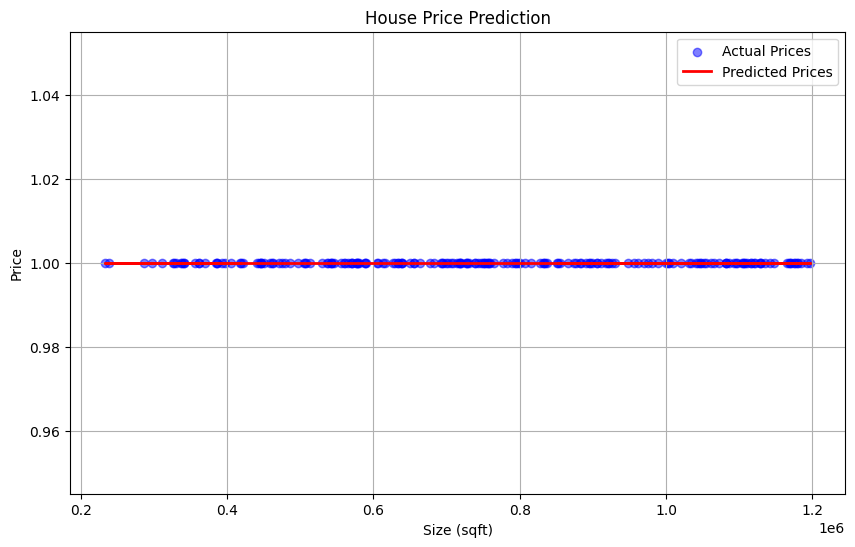

In [58]:
y_test_pred = linear_reg_model.predict(x_test_scaled)
plt.figure(figsize=(10, 6))

plt.scatter(x_test.iloc[:, 0], y_test, color='blue', label='Actual Prices', alpha=0.5)

plt.plot(x_test.iloc[:, 0], y_test_pred, color='red', label='Predicted Prices', linewidth=2)

plt.title('House Price Prediction')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

This report demonstrates the implementation of a linear regression model to predict house prices based on features like size, number of bedrooms, age of the house, and proximity to downtown. The model was trained on a dataset and evaluated on a testing set.

Data Preprocessing -  The features (Size, Bedrooms, Age, Proximity) were normalized to have a mean of 0 and standard deviation of 1 to ensure they are on a similar scale.

Model Implementation - The linear regression model was implemented using the least squares method.

Model Evaluation - Model Assessment
On the testing set, the trained model was assessed. To assess the model's performance on data that hasn't been seen, the MSE on the test data was computed.
Plotting the actual test data points against the estimated costs allowed for the visualization of the results. The actual prices were plotted in blue and the forecasted prices were plotted in red in a scatter plot. Plotting of the regression line was also done.